# Data Visualization

Import necessary modules and define function for wavelet conversion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pywt
def wavelet(data, level, wavelet):
    (cA, cD) = pywt.dwt(data, wavelet=wavelet)
    for i in range(1, level):
        (cA, cD) = pywt.dwt(cA, wavelet=wavelet)
    return cA, cD

Read data for a single gesture from files and create a dataframe with it
Trying to figure out which wavelet transform would be best to use

In [43]:
gesture = 2
fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
for i in range(1,2):
    filepath = 'hand/hand_{0}_{1}.csv'.format(gesture, i)
    data = pd.read_csv(filepath, index_col=False)
    fulldata = fulldata.append(data)

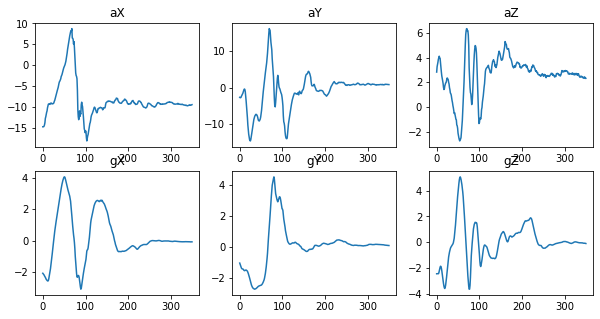

In [44]:
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(fulldata.iloc[i*350:(i+1)*350,0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(fulldata.iloc[i*350:(i+1)*350,1])
    axs[0,1].set_title('aY')
    axs[0,2].plot(fulldata.iloc[i*350:(i+1)*350,2])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(fulldata.iloc[i*350:(i+1)*350,3])
    axs[1,0].set_title('gX')
    axs[1,1].plot(fulldata.iloc[i*350:(i+1)*350,4])
    axs[1,1].set_title('gY')
    axs[1,2].plot(fulldata.iloc[i*350:(i+1)*350,5])
    axs[1,2].set_title('gZ')

Check length and shape of features after transform

bior1.1 394


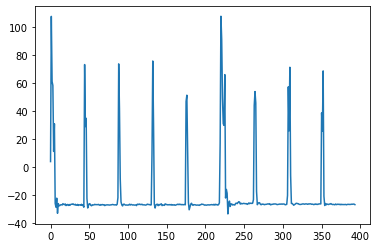

bior1.3 398


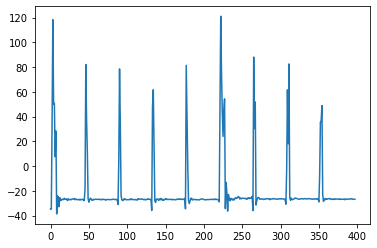

bior1.5 401


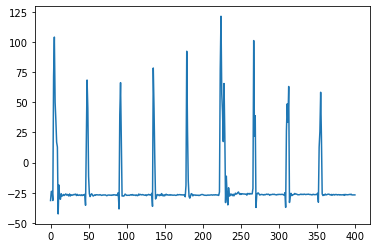

bior2.2 398


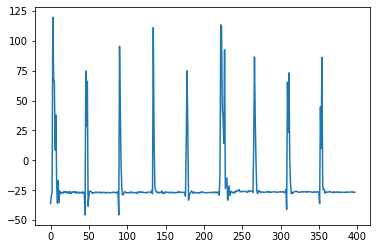

bior2.4 401


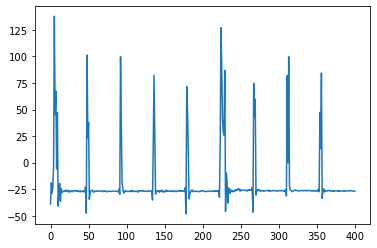

bior2.6 405


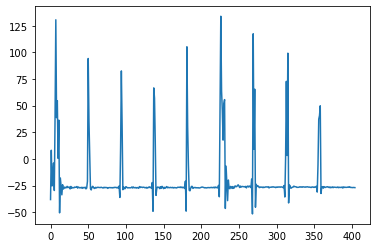

bior2.8 408


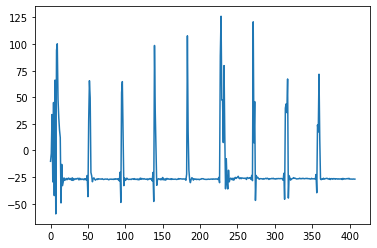

bior3.1 396


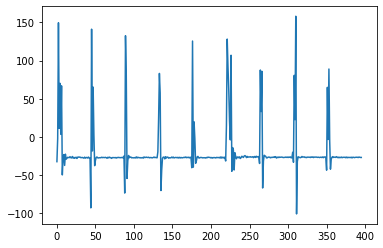

bior3.3 399


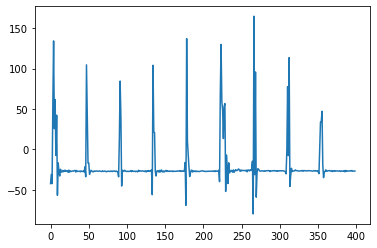

bior3.5 403


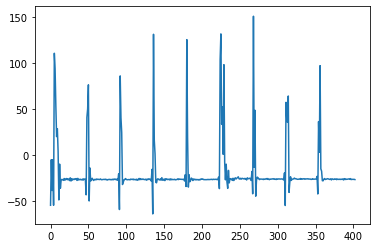

bior3.7 406


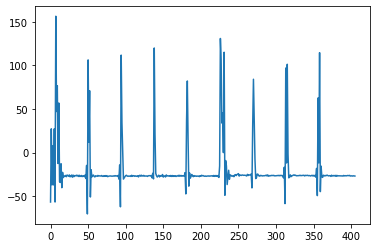

bior3.9 410


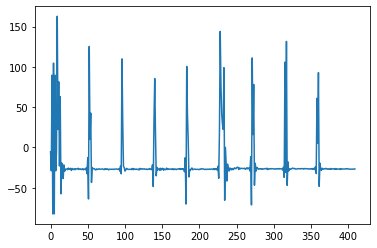

bior4.4 401


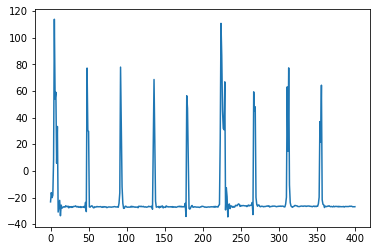

bior5.5 403


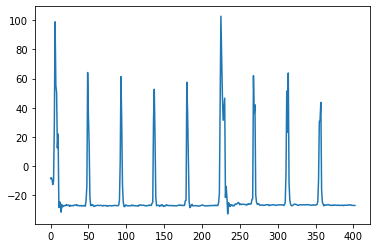

bior6.8 408


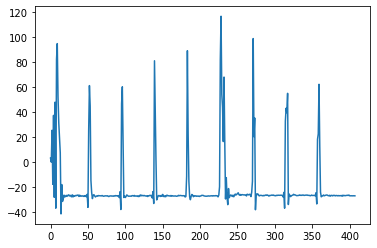

coif1 398


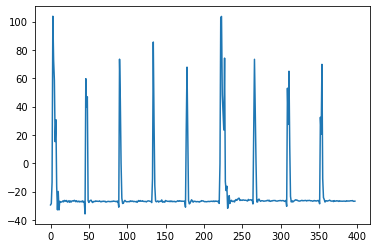

coif2 403


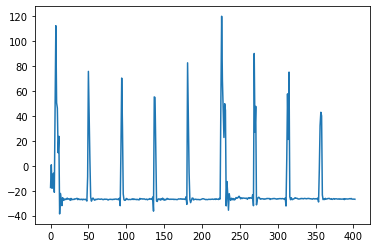

coif3 408


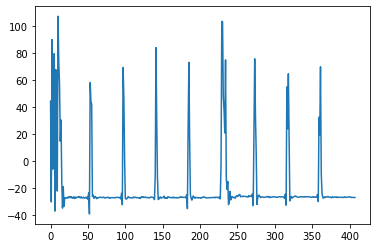

coif4 413


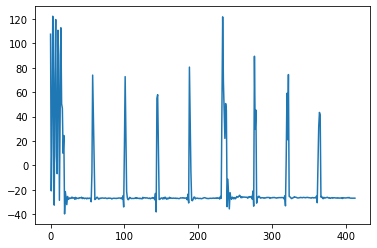

coif5 419


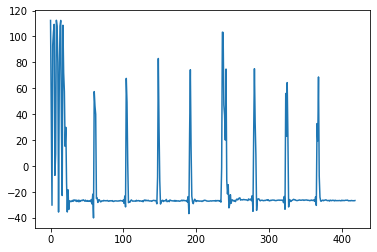

coif6 424


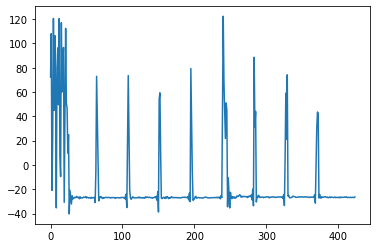

coif7 429


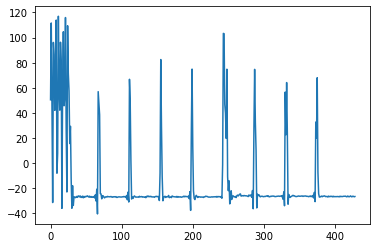

coif8 434


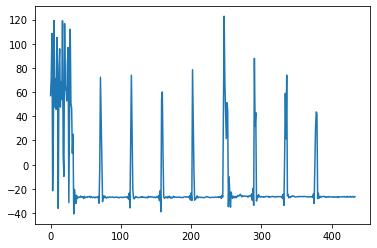

coif9 440


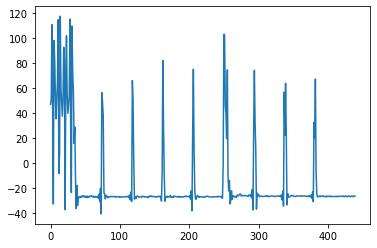

coif10 445


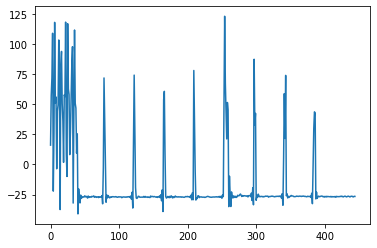

coif11 450


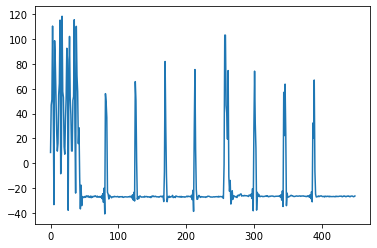

coif12 455


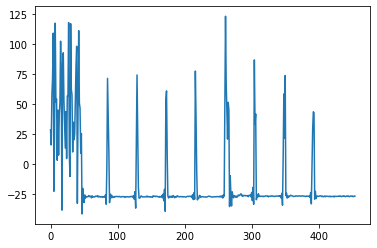

coif13 461


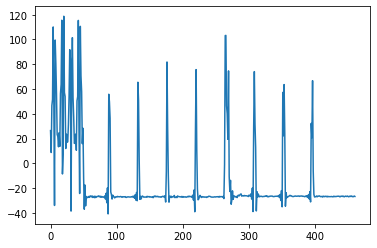

coif14 466


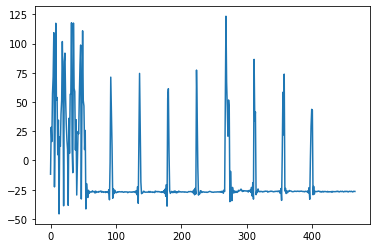

coif15 471


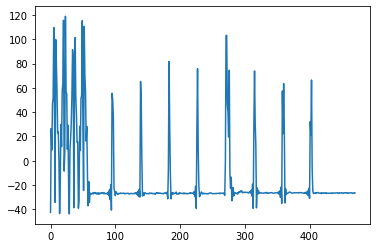

coif16 476


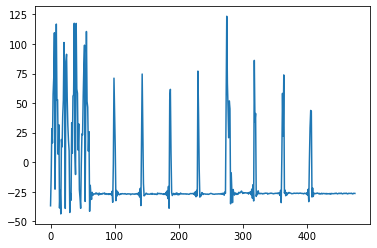

coif17 482


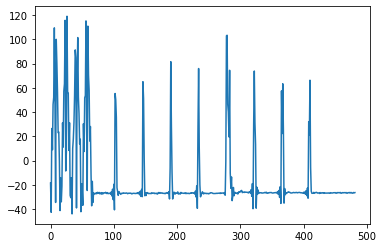

db1 394


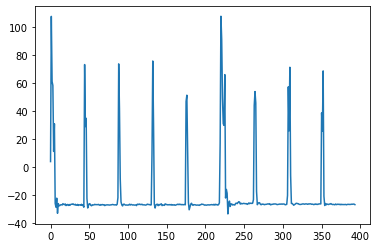

db2 396


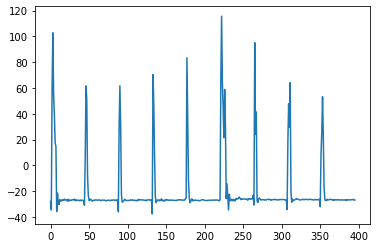

db3 398


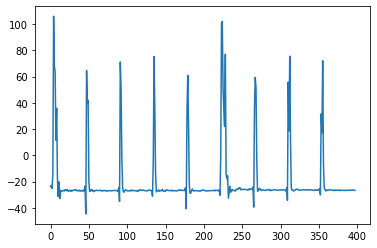

db4 399


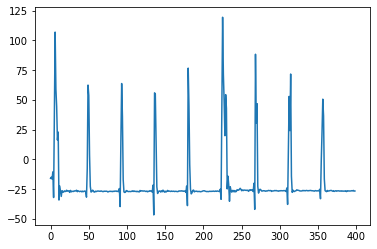

db5 401


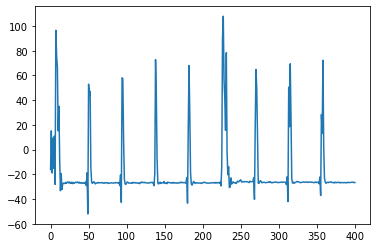

db6 403


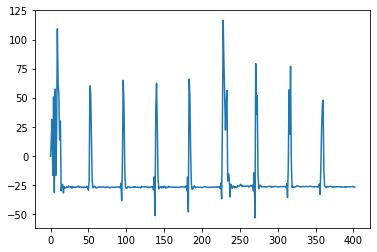

db7 405


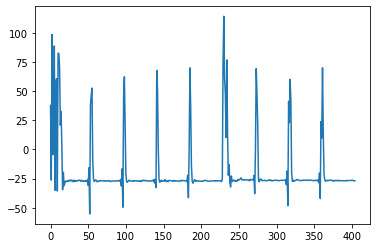

db8 406


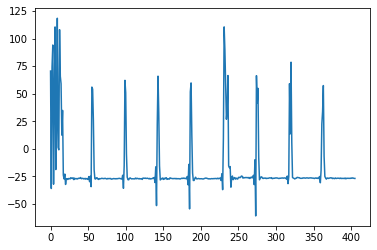

db9 408


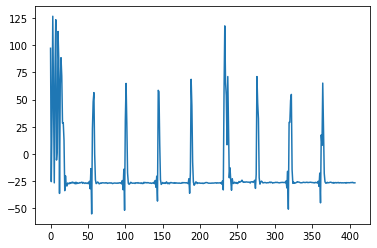

db10 410


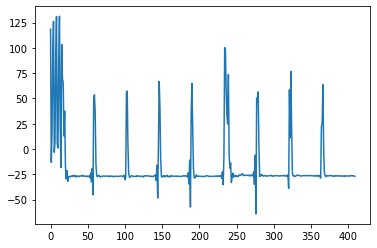

db11 412


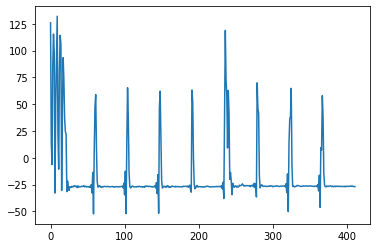

db12 413


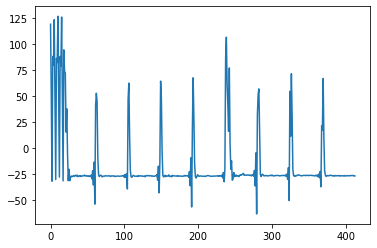

db13 415


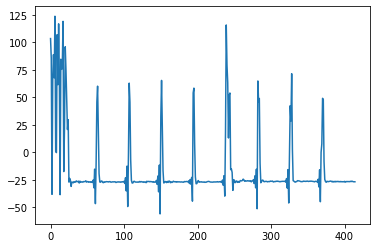

db14 417


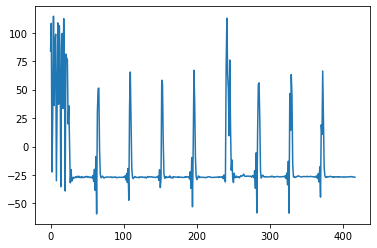

db15 419


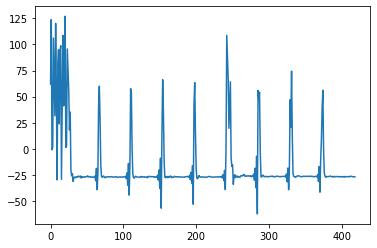

db16 420


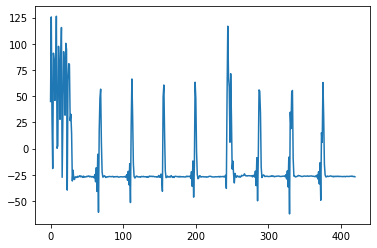

db17 422


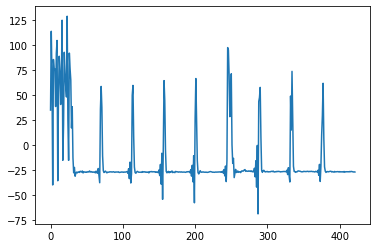

db18 424


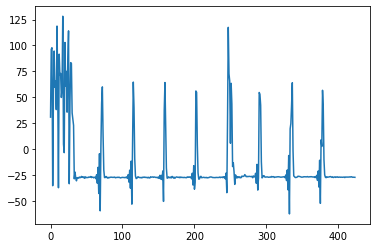

db19 426


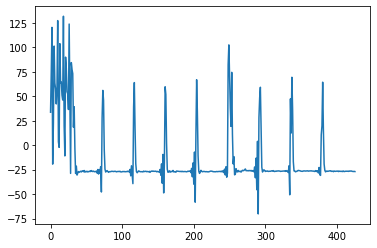

db20 427


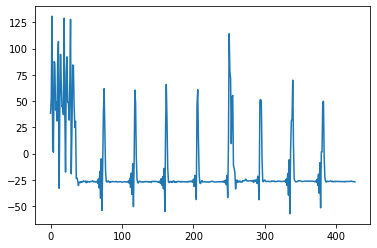

db21 429


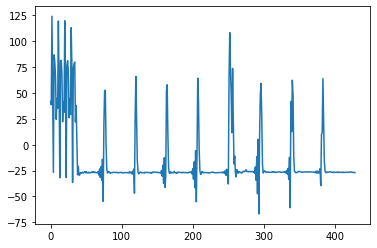

db22 431


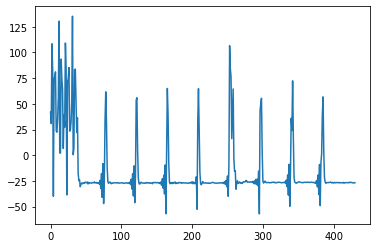

db23 433


KeyboardInterrupt: 

In [33]:
for wave in pywt.wavelist(kind = 'discrete'):
    cA, cD = wavelet(fulldata.iloc[0:, 0], 3, wave)
    print(wave, len(cA))
    plt.plot(cA)
    plt.show()

Visualize different levels of the wavelet transform

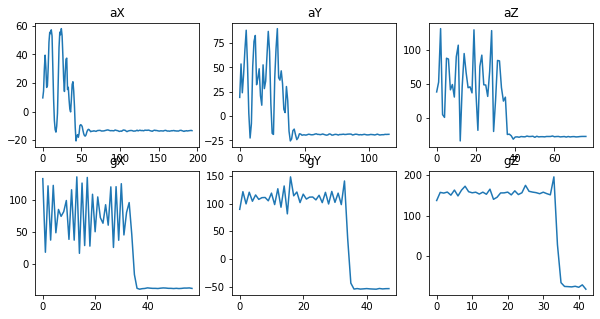

In [39]:
wave = 'db20'
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],1, wave)[0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],2, wave)[0])
    axs[0,1].set_title('aY')
    axs[0,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],3, wave)[0])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],4, wave)[0])
    axs[1,0].set_title('gX')
    axs[1,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],5, wave)[0])
    axs[1,1].set_title('gY')
    axs[1,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],6, wave)[0])
    axs[1,2].set_title('gZ')
#plt.savefig('waveletDet_{0}.jpg'.format(gesture))

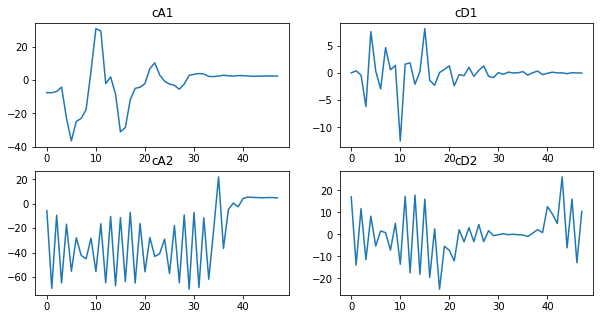

In [48]:
wavetype2 = 'db20'
level2 = 5
wavetype1 = 'rbio2.2'
level1 = 3

fig, axs = plt.subplots(2,2, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,1], level1, wavetype1)[0])
    axs[0,0].set_title('cA1')
    axs[0,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,1], level1, wavetype1)[1])
    axs[0,1].set_title('cD1')
    axs[1,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,1], level2, wavetype2)[0])
    axs[1,0].set_title('cA2')
    axs[1,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,1], level2, wavetype2)[1])
    axs[1,1].set_title('cD2')


Plot the entire data for every gesture to visually compare and identify trends

In [38]:
gestures = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10
]

for gesture in gestures:
    fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
    fig, axs = plt.subplots(2,3, figsize = [10,5])
    for i in range(1,51):
        filepath = 'hand/hand_{0}_{1}.csv'.format(gesture, i)
        data = pd.read_csv(filepath, index_col=False)
        fulldata = fulldata.append(data)

        
        axs[0,0].plot(fulldata.iloc[(i-1)*350:i*350,0])
        axs[0,0].set_title('aX')
        axs[0,1].plot(fulldata.iloc[(i-1)*350:i*350,1])
        axs[0,1].set_title('aY')
        axs[0,2].plot(fulldata.iloc[(i-1)*350:i*350,2])
        axs[0,2].set_title('aZ')
        axs[1,0].plot(fulldata.iloc[(i-1)*350:i*350,3])
        axs[1,0].set_title('gX')
        axs[1,1].plot(fulldata.iloc[(i-1)*350:i*350,4])
        axs[1,1].set_title('gY')
        axs[1,2].plot(fulldata.iloc[(i-1)*350:i*350,5])
        axs[1,2].set_title('gZ')
        
    plt.savefig('Data visualization/hand_{0}.jpg'.format(gesture))
    plt.close()